These are solutions to the following questions: https://hyperelliptic.org/tanja/teaching/crypto21/first.pdf

# Exercise 1

## Exercise 1a-c

In [1]:
p = 1613
q = 1949
e = 2^16+1
p, q, e

(1613, 1949, 65537)

In [2]:
n = p*q
phi_n = (p-1)*(q-1)
d = Mod(1/e, phi_n)
n, phi_n, d

(3143737, 3140176, 1865601)

## Exercise 1d

In [3]:
# Watch out! The numbers are different from those in the earlier questions!
n = 1173031
e = 65537
d = 378449

In [4]:
# The ciphertext given in the exercise
c = 601090

In [5]:
m = Mod(c^d, n)
m

888341

# Exercise 2

In [2]:
n = 246106655759
a = 3875506

## Exercise 2a

In [3]:
s = lcm([1,2,3,4,5,6,7,8,9,10,11,12,13])
s

360360

In [4]:
# To verify our answer, we factor s and see whether it has the expected form
s.factor()

2^3 * 3^2 * 5 * 7 * 11 * 13

## Exercise 2b

In [5]:
# Do not forget the __mod n__!
b = Mod(a ^ s, n)
b

202588267824

## Exercise 2c

In [6]:
p = int(gcd(b-1, n))
p

11056501

## Exercise 2d

In [7]:
q = n/p
q

22259

In [8]:
# As a sanity check, let us verify whether p*q = n
p * q == n

True

## Exercise 2e

In [9]:
(p-1).factor()

2^2 * 3^5 * 5^3 * 7 * 13

After dividing $p-1$ by the factors which $p-1$ and $s$ have in common, we obtain `3^3 * 5^2`.

In [10]:
(q-1).factor()

2 * 31 * 359

After dividing $q-1$ by the factors which $1-1$ and $s$ have in common, we obtain `31 * 359`.

In [11]:
s.factor()

2^3 * 3^2 * 5 * 7 * 11 * 13

After dividing $s$ by the factors which $p-1$ and $s$ have in common, we obtain `2 * 11`.

After dividing $s$ by the factors which $q-1$ and $s$ have in common, we obtain `2^2 * 3^2 * 5 * 7 * 11 * 13`.

In [12]:
GF(p)(a).multiplicative_order().factor()

2^2 * 3^2 * 5 * 7 * 13

After dividing by the factors which $p-1$ and $s$ have in common, we obtain `1` (i.e. no factors are left over).
<div class="alert alert-success">
    Note that this is a necessary (but not sufficient) condition for the $p-1$ method to work.
</div>

In [13]:
GF(q)(a).multiplicative_order().factor()

31 * 359

After dividing by the factors which $q-1$ and $s$ have in common, we obtain `31 * 359`.

<div class="alert alert-success">
    Note that this is also a necessary (but not sufficient) condition for the $p-1$ method to work; we need to have that this does not give $1$ (i.e. at least one factor is left over).
</div>

$p$ divides the `gcd` if and only if the order of $a$ (in $\mathbb{F}_p^*$) does not divide any of the factors which $p-1$ has, and $s$ does not have; that is, the order of $a$ should be divisible by neither $3^3=27$ nor $5^2=25$.

Out of every 675 numbers, there are $27+25-1$ numbers which divide either $3^3$ or $5^2$ (or both, for which we subtract one element).
Hence, for a fraction of $\frac{51}{675}$ of the bases $a$, we have that $p$ doesn't divide the `gcd`.

**We need that $p$ divides the gcd and $q$ does not divide the gcd.**

Similarly, we have that $q$ divides the `gcd` if and only if the order of $a$ in $\mathbb{F}_q^*$ does not divide any of the factors which $q-1$ has, and $s$ does not have; that is, the order of $a$ should be divisible by neither 31 nor 359.

Out of every $31*359=11129$ numbers, there are $31+359-1=389$ numbers which divide either 31 or 359 (or both, for which we subtract one element).
Hence, for a fraction of $\frac{389}{11129}$ of the bases $a$, we have that $q$ divides the `gcd`.

We have that the algorithm succeeds in factoring $n$ if and only if $p$ divides the `gcd` and $q$ does not divide the `gcd`.
This happens for a fraction of $\frac{51}{675}\left(1-\frac{389}{11129}\right)=\frac{12172}{166935}$ of the bases $a$.

<div class="alert alert-danger">
    Maybe I have flipped the numbers around here.
    How do I check this (apart from 'just trying')?
</div>

In [15]:
(p-1)/(3^3*5^2) # there are ... numbers which have order dividing 3^3 and 5^2, for which it will work

16380

In [16]:
# There are ... numbers 
(q-1)/(31*359)

2

We need $a^{s} = 1 \mod p$ and $a^{s} \neq 1 \mod q $ (the latter only holds if order of a in F_q^* divides 2, which means the order is 1 or 2)

Only 2 elements out of $q-1$ will make the method fail. The probability that it fails is 2/(q-1).

# Exercise 3

In [18]:
p = 3373
Fp = GF(p)
A = 471

In [19]:
# It might be useful to read up on the EllipticCurve documentation here, to prevent any mistakes.
#?EllipticCurve

In [20]:
E = EllipticCurve(Fp, [0, A, 0, 1, 0])
E

Elliptic Curve defined by y^2 = x^3 + 471*x^2 + x over Finite Field of size 3373

In [21]:
# To verify whether we are doing this correctly, let's compute the number of points (which is given and should be equal to 3440).
E.cardinality()

3440

In [22]:
# Define the generator
P = E(1278, 981)
P

(1278 : 981 : 1)

In [23]:
# Define the point for which we want to find the discrete logarithm
Q = E(1043, 630)
Q

(1043 : 630 : 1)

In [24]:
# Let's compute the solution, so we can use it to check what we are doing later on
solution = P.discrete_log(Q)
solution

3437

## Exercise 3a

<!-- 1. for $i = 1$ to $r$
    
    1.1 put $Q_i = Q$, $a_{i,−1} = 0$, $n_i =n/p_i$

    1.2 compute $R_i = n_i P$
    
    1.3 for $j = 0$ to $e_i − 1$

      1.3.1 compute $n_i = n/p_i^{j+1}$ # divide old $n_i$ by $p_i$ unless $j = 0$
        
      1.3.2 compute $Q_i = Q_i − (a_{i,j−1}p_i^{j−1})P$

      1.3.3 compute $S_i = n_i Q_i$
        
      1.3.4 solve DLP $S_i = a_{i,j} R_i$ of order $p_i$

    1.4 compute $a_i \equiv \sum\limits_{j=0}^{e_j−1}a_{i,j}p_i^j$ -->
    
For the Pohlig-Hellman attack on Elliptic curves, we have the following algorithm:

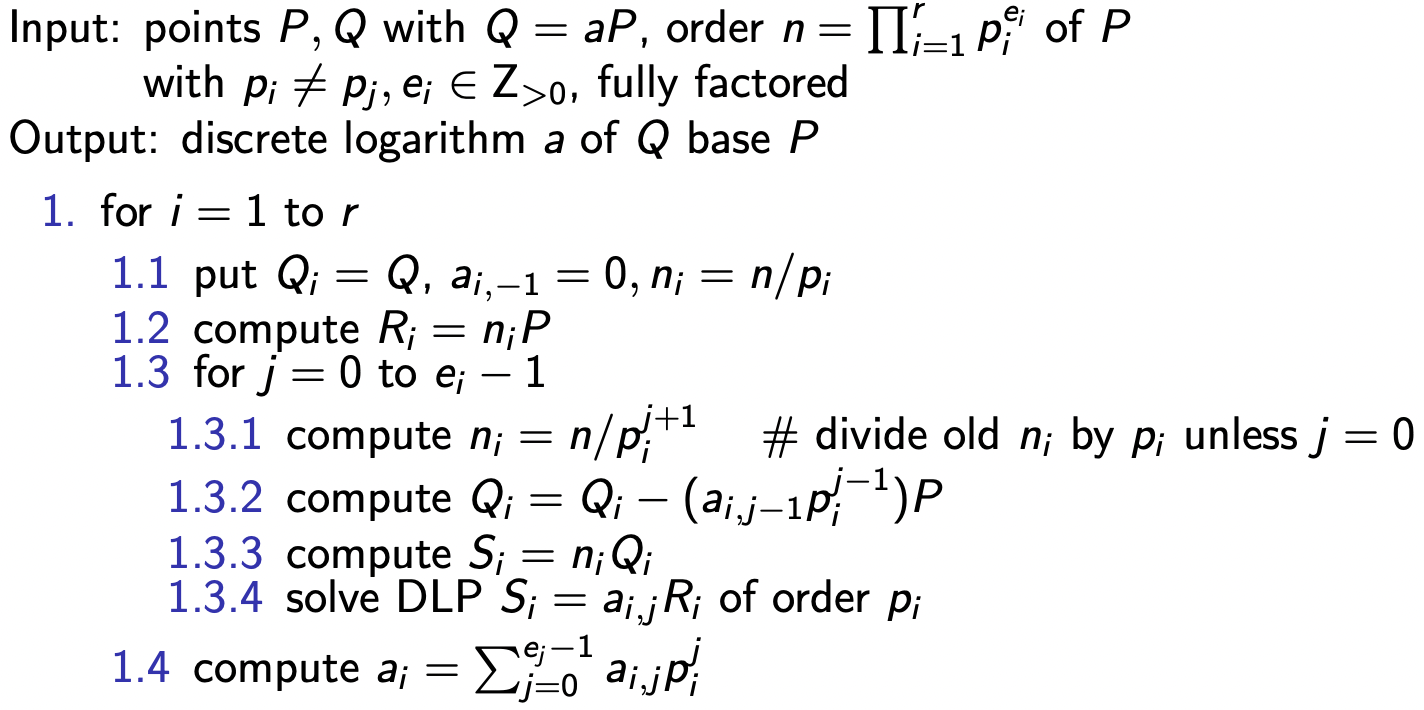

Before we can start working on the algorithm, we have to state a few more of the parameters it needs.

In [25]:
n = 3440 # number of points on the curve

<div class="alert alert-info">
    Finally, to prevent confusion later on, it may be smart to look up the notation of the neutral element in SageMath:
</div>

In [26]:
E(0)

(0 : 1 : 0)

<div class="alert alert-info">
    Now, we can finally start working on performing the algorithm.
</div>

In [27]:
# Here, we have to compute the discrete logarithm base 2^4
# Hence, we have p_i = 2
p_i = 2

In [28]:
Q_i = Q
a_ijminus1 = 0
n_i = n/p_i

In [29]:
R_i = n_i * P

### `for`-loop, iteration 0

In [30]:
j = 0

In [31]:
n_i = n/(p_i^(j+1))

In [32]:
Q_i = Q_i - (a_ijminus1*p_i^(j-1))*P

In [33]:
S_i = n_i*Q_i

In [34]:
S_i, R_i

((0 : 0 : 1), (0 : 0 : 1))

At this point, we need to solve the discrete logarithm $S_i=a_{2,0}R_i$. Filling in the points we just obtained, we get
$$(0,0) = a_{2,0} (0,0)$$
Clearly, this holds when $a_{2,0}=1$.

In [35]:
# To check our results, we perform the following computation
a_ijminus1 = R_i.discrete_log(S_i)
a_ijminus1

1

In [36]:
# As a sanity check, let us compute the correct result from the already-computed discrete logarithm.
Mod(solution, 2^1)

1

### `for`-loop, iteration 1

In [37]:
j = 1

In [38]:
n_i = n/(p_i^(j+1))

In [39]:
Q_i = Q_i - (a_ijminus1*p_i^(j-1))*P

In [40]:
S_i = n_i*Q_i

In [41]:
S_i, R_i

((0 : 1 : 0), (0 : 0 : 1))

At this point, we need to solve the discrete logarithm $S_i=a_{2,1}R_i$. Filling in the points we just obtained, we get
$$P_\infty = a_{2,1} (0,0)$$
Clearly, this holds when $a_{2,1}=0$.

In [42]:
# To check our results, we perform the following computation
a_ijminus1 = R_i.discrete_log(S_i)
a_ijminus1

0

### `for`-loop, iteration 2

In [43]:
j = 2

In [44]:
n_i = n/(p_i^(j+1))

In [45]:
Q_i = Q_i - (a_ijminus1*p_i^(j-1))*P

In [46]:
S_i = n_i*Q_i

In [47]:
S_i, R_i

((0 : 0 : 1), (0 : 0 : 1))

At this point, we need to solve the discrete logarithm $S_i=a_{2,2}R_i$. Filling in the points we just obtained, we get
$$(0,0) = a_{2,2} (0,0)$$
Clearly, this holds when $a_{2,2}=1$.

In [48]:
# To check our results, we perform the following computation
a_ijminus1 = R_i.discrete_log(S_i)
a_ijminus1

1

### `for`-loop, iteration 3

In [49]:
j = 3

In [50]:
n_i = n/(p_i^(j+1))

In [51]:
Q_i = Q_i - (a_ijminus1*p_i^(j-1))*P

In [52]:
S_i = n_i*Q_i

In [53]:
S_i, R_i

((0 : 0 : 1), (0 : 0 : 1))

At this point, we need to solve the discrete logarithm $S_i=a_{2,3}R_i$. Filling in the points we just obtained, we get
$$(0,0) = a_{2,3} (0,0)$$
Clearly, this holds when $a_{2,3}=1$.

In [54]:
# To check our results, we perform the following computation
a_ijminus1 = R_i.discrete_log(S_i)
a_ijminus1

1

### Combining the results

In [55]:
# Our intermediate results were
a2_0 = 1
a2_1 = 0
a2_2 = 1
a2_3 = 1

# Our final result is
a_2 = a2_0 + a2_1*2 + a2_2*2^2 + a2_3*2^3
a_2

13

In [56]:
# As a sanity check, let us compute the correct result from the already-computed discrete logarithm.
Mod(solution, 2^4)

13

In [57]:
# To verify our result, we compute (a_2)*(n/2^4)*P, and check whether this is equal to (n/2^4)*Q.
a_2 * (n/2^4)*P, (n/2^4)*Q, a_2 * (n/2^4)*P == (n/2^4)*Q

((1869 : 73 : 1), (1869 : 73 : 1), True)

<div class="alert alert-success">
    Hence, we get that $a\equiv 13\mod 2^4$.
</div>

## Exercise 3b

In [58]:
# Here, we have to compute the discrete logarithm base 5
# Hence, we have p_i = 5
p_i = 5

In [59]:
Q_i = Q
a_ijminus1 = 0
n_i = n/p_i

In [60]:
R_i = n_i * P

### `for`-loop, iteration 0

In [61]:
j = 0

In [62]:
n_i = n/(p_i^(j+1))

In [63]:
Q_i = Q_i - (a_ijminus1*p_i^(j-1))*P

In [64]:
S_i = n_i*Q_i

In [65]:
S_i, R_i

((323 : 896 : 1), (2477 : 698 : 1))

At this point, we need to solve the discrete logarithm $S_i=a_{5}R_i$. Filling in the points we just obtained, we get
$$(0,0) = a_{5} (0,0)$$

Next, we compute $k(2477,698)$, for $k\in\{0,1,2,3,4\}$.

In [66]:
for k in range(0,7):
    print(str(k) + "*" + str(R_i) + " = " + str(k*R_i))

0*(2477 : 698 : 1) = (0 : 1 : 0)
1*(2477 : 698 : 1) = (2477 : 698 : 1)
2*(2477 : 698 : 1) = (323 : 896 : 1)
3*(2477 : 698 : 1) = (323 : 2477 : 1)
4*(2477 : 698 : 1) = (2477 : 2675 : 1)
5*(2477 : 698 : 1) = (0 : 1 : 0)
6*(2477 : 698 : 1) = (2477 : 698 : 1)


Hence, we get that the equation holds if $a_5=2$.

In [67]:
# To check our results, we perform the following computation
a_5 = R_i.discrete_log(S_i)
a_5

2

In [68]:
# As a sanity check, let us compute the correct result from the already-computed discrete logarithm.
Mod(solution, 5)

2

Next, we verify our results:

In [69]:
# To verify our result, we compute (a_5)*(n/5)*P, and check whether this is equal to (n/5)*Q.
a_5 * (n/5)*P, (n/5)*Q, a_5 * (n/5)*P == (n/5)*Q

((323 : 896 : 1), (323 : 896 : 1), True)

<div class="alert alert-success">
    Thus, we obtain $a\equiv 2\mod 5$.
</div>

## Exercise 3c

In [70]:
# Here, we have to compute the discrete logarithm base 43
# Hence, we have p_i = 43
p_i = 43

In [71]:
Q_i = Q
a_ijminus1 = 0
n_i = n/p_i

In [72]:
R_i = n_i * P

### `for`-loop, iteration 0

In [73]:
j = 0

In [74]:
n_i = n/(p_i^(j+1))

In [75]:
Q_i = Q_i - (a_ijminus1*p_i^(j-1))*P

In [76]:
S_i = n_i*Q_i

In [77]:
S_i, R_i

((3088 : 2681 : 1), (1354 : 929 : 1))

Hence, we have that the image of the target in the subgroup of order $\ell=43$ is $(3088,2681)$, while the image of the base in the subgroup of order $\ell$ is $(1354,929)$.

### Baby steps
First, we compute the baby steps. We use point addition here to compute the next step.

In [78]:
m = floor(sqrt(p_i))

# Define the 0th baby step
baby_step = 0*R_i

# Define an array in which to store the baby steps. Useful for comparison later on.
baby_steps = [None for i in range(m)]

for i in range(m):
    baby_steps[i] = baby_step
    print("Baby step " + str(i) + " is given by (" + str(baby_step) + ", " + str(i) + ")")
    baby_step = baby_step + R_i

Baby step 0 is given by ((0 : 1 : 0), 0)
Baby step 1 is given by ((1354 : 929 : 1), 1)
Baby step 2 is given by ((3103 : 1459 : 1), 2)
Baby step 3 is given by ((3088 : 692 : 1), 3)
Baby step 4 is given by ((863 : 2231 : 1), 4)
Baby step 5 is given by ((2054 : 1360 : 1), 5)


### Giant steps

We already computed the point we need to add to our target in every giant step (which is the point $mP$) at the end of the previous calculations.

In [79]:
giant_step_base = baby_step # after m additions, we have the point we need to add in every giant step

Now, we start from our target, and then add the point $mP$ to it.

In [80]:
# Define the 0th giant step
giant_step = S_i # S_i is our target

giant_steps = [None for j in range(m)]

for j in range(m):
    giant_steps[j] = giant_step
    print("Giant step " + str(j) + " is given by (" + str(giant_step) + ", " + str(j) + ")")
    giant_step = giant_step + giant_step_base

Giant step 0 is given by ((3088 : 2681 : 1), 0)
Giant step 1 is given by ((3088 : 692 : 1), 1)
Giant step 2 is given by ((2428 : 1941 : 1), 2)
Giant step 3 is given by ((1680 : 375 : 1), 3)
Giant step 4 is given by ((763 : 3062 : 1), 4)
Giant step 5 is given by ((2349 : 190 : 1), 5)


We can already see that there is a collision when $i=3$ and $j=1$. We will also compute this algorithmically:

In [81]:
for j in range(m):
    for i in range(m):
        if giant_steps[j] == baby_steps[i]:
            collision = (i, j)
            break

print("We have a collision for i = " + str(collision[0]) + " and j = " + str(collision[1]) + ".")

We have a collision for i = 3 and j = 1.


From this collision, we can compute $a\mod \ell$ using the following formula:
$$a\equiv i-j\cdot m \mod n$$
where $n$ is the order of the subgroup in which we are computing the discrete logarithm.

In [82]:
# We need to watch out: what is called n in the equation above is (currently) called p_i in our code.
i = collision[0]
j = collision[1]
a = Mod(i - j*m, p_i)
a

40

In [83]:
# As a sanity check, let us compute the correct result from the already-computed discrete logarithm.
Mod(solution, 43)

40

In [84]:
# To verify our result, we compute (a_43)*(n/43)*P, and check whether this is equal to (n/43)*Q.
int(a) * (n/43)*P, (n/43)*Q, int(a) * (n/43)*P == (n/43)*Q

((3088 : 2681 : 1), (3088 : 2681 : 1), True)

<div class="alert alert-warning">
    In a similar way to what has happened before, it is sometimes necessary to explicitly cast $a$ to an `int` in Python. Otherwise, SageMath will complain about integers being defined on different rings (or something like that)...
</div>

<div class="alert alert-success">
    We can conclude from this that $a\equiv 40\mod 43$.
</div>

## Exercise 3d

Finally, we need to compute the results to obtain $b$. This is easy and straightforward to do using the `CRT` function in SageMath, but it should be done carefully to avoid mixing up the parameters.

In [85]:
found_solution = CRT([13, 2, 40], [2^4, 5, 43])
found_solution

3437

In [86]:
# Finally, we verify our found solution.
# This can easily be done by computing a*P (where a is the found solution) and verifying whether it is equal to Q.
found_solution*P == Q

True

## Exercise 3e

## Exercise 3f

# Exercise 4

## Exercise 4a

In [87]:
B0 = 727630662689
B1 = 0
B2 = 0
p_initial = 3 * 2^121 + B2 * 2^81 + B1 * 2^41 + B0 * 2 + 1

# Display the odd integer from which we start computing
p_initial

7975367974709495237422843816943392835

In [88]:
p = p_initial
while (not p.is_prime()):
    p += 2

# Check whether p is indeed a prime, and display its value
p.is_prime(), p

(True, 7975367974709495237422843816943392841)

In [89]:
# Let us compute the difference between the odd integer and p.
p - p_initial

6

## Exercise 4b

## Exercise 4c

In [90]:
n = 69819439634718661684574469288929760615090883112960658550354041188301154079
B1 = 0
B2 = 0

In [91]:
# X is the upper bound on the value of the prime we are looking for
# Since we have that p = 3*2^121 + B0*2 + 1 + c (for some low value of c), we have that a bound of 2^42 should be enough to obtain p
X = 2^42

In [92]:
# a gives the upper 123-41 bits, appended with zeroes for the remaining bits.
# Although it looks like all of these are 0, we actually have that the uppermost bits are defined by the term 3*2^121 which is present in p.
# Hence, we get
a = 3*2^121

In [93]:
M_1 = matrix([
    [X^2, a*X, 0],
    [0, X, a],
    [0, 0, n]
])
B_1 = M_1.LLL()

In [94]:
Q_1 = B_1[0][0]*x^2/X^2 + B_1[0][1]*x/X + B_1[0][2]
Q_1.roots(ring=ZZ)

[(-7975367974709495237422842361682067456, 1)]

In [95]:
p = a + Q_1.roots(ring=ZZ)[0][0]
p

0

<div class="alert alert-danger">
    It seems like this matrix is too small for Coppersmith's method to work.
</div>

In [96]:
M_2 = matrix([
    [X^4, 2*a*X^3, a^2*X^2, 0, 0],
    [0, X^3, 2*a*X^2, a^2*X, 0],
    [0, 0, X^2, 2*a*X, a^2],
    [0, 0, 0, n*X, a*n],
    [0, 0, 0, 0, n^2]
])
B_2 = M_2.LLL()

In [97]:
Q_2 = B_2[0][0]*x^4/X^4 + B_2[0][1]*x^3/X^3 + B_2[0][2]*x^2/X^2 + B_2[0][3]*x/X + B_2[0][4]
Q_2.roots(ring=ZZ)

[(58928224483, 1)]

In [98]:
p = a + Q_2.roots(ring=ZZ)[0][0]
p

7975367974709495237422842420610291939

In [99]:
q = n/p
p * q == n

True

<div class="alert alert-success">
    This matrix is big enough for Coppersmith's method to work.
</div>

In [100]:
M_3 = matrix([
    [X^6, 3*a*X^5, 3*a^2*X^4, a^3*X^3, 0, 0, 0],
    [0, X^5, 3*a*X^4, 3*a^2*X^3, a^3*X^2, 0, 0],
    [0, 0, X^4, 3*a*X^3, 3*a^2*X^2, a^3*X, 0],
    [0, 0, 0, X^3, 3*a*X^2, 3*a^2*X, a^3],
    [0, 0, 0, 0, n*X^2, 2*a*n*X, a^2*n],
    [0, 0, 0, 0, 0, n^2*X, a*n^2],
    [0, 0, 0, 0, 0, 0, n^3]
])
B_3 = M_3.LLL()

In [101]:
Q_3 = B_3[0][0]*x^6/X^6 + B_3[0][1]*x^5/X^5 + B_3[0][2]*x^4/X^4 + B_3[0][3]*x^3/X^3 + B_3[0][4]*x^2/X^2 + B_3[0][5]*x/X + B_3[0][6]
Q_3.roots(ring=ZZ)

[(58928224483, 1)]

In [102]:
p = a + Q_3.roots(ring=ZZ)[0][0]
p

7975367974709495237422842420610291939

In [103]:
q = n/p
p * q == n

True

<div class="alert alert-success">
    This matrix is also big enough for Coppersmith's method to work, as expected; making the matrix larger adds more redundant information, so if a smaller matrix works, then a larger one should work as well.
</div>

In [104]:
# Some computation to see why this might have worked (but not a sufficient proof); we compute whether the number of bits in the unknown part of p is less than one third of the number of bits in p
(p-a).nbits(), (p-a).nbits() < p.nbits()/3

(36, True)

# Exercise 5